<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Linear-Algorithms/LDA/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

Logistic Regression has it's own limitations such as it's useful for two-class classification problems or, it becomes unstable if these classes are well separated from each other or, if the number of observations is low. LDA is good alternative linear classification technique which can handle these limitations of Logistic Regression.

_**Linear Discriminant Analysis (LDA)** is a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification[[1](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)]._

## Table of Content

1. [Introduction](#intro)
2. [Import Libraries](#libraries)
3. [Load Sample Data](#sample)
4. [Manual Implementation of LDA](#manual)
5. [Scikit Learn Functio with Sample Data](#sklearn)
6. [Real Life Dataset](#realdata)

## Introduction<a id='intro'></a>

The purpose of this project is to have knowledge on how LDA works. To achive this goal, we'll firts manually implement the algorithm by using a custom generated dataset. Then we'll apply the `LinearDiscriminantAnalysis` from `sklearn` library to the same dataset to compare the results of manual implementation. Then we'll apply the `LinearDiscriminantAnalysis` from `sklearn` library to solve a binary classification problem by using a dataset from [Kaggle](https://www.kaggle.com/datasets/dragonheir/logistic-regression) and compare the results of it with `LogisticRegression`. Finally, we'll three class classfication problem with well-known Iris dataset.

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Load Sample Data<a id='sample'></a>

In [2]:
# Creating the feature(s)
x = [4.667797637, 5.509198779, 4.702791608, 5.956706641, 5.738622413, 5.027283325, 4.805434058, 4.425689143, 
5.009368635, 5.116718815, 6.370917709, 2.895041947, 4.666842365, 5.602154638, 4.902797978, 5.032652964, 4.083972925, 4.875524106, 
4.732801047, 5.385993407, 20.74393514, 21.41752855, 20.57924186, 20.7386947, 19.44605384, 18.36360265, 19.90363232, 19.10870851, 
18.18787593, 19.71767611, 19.09629027, 20.52741312, 20.63205608, 19.86218119, 21.34670569, 20.333906, 21.02714855, 18.27536089, 
21.77371156, 20.65953546]

# Creating the label
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

In [3]:
# Convert the data into dataframe
df = pd.DataFrame(columns=['x', 'y'])
df['x'] = x
df['y'] = y

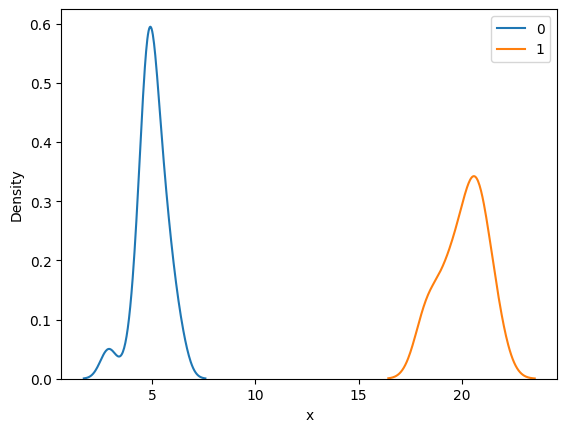

In [4]:
sb.kdeplot(x=df['x'][df['y']==0], label='0')
sb.kdeplot(x=df['x'][df['y']==1], label='1')
plt.legend()
plt.show()

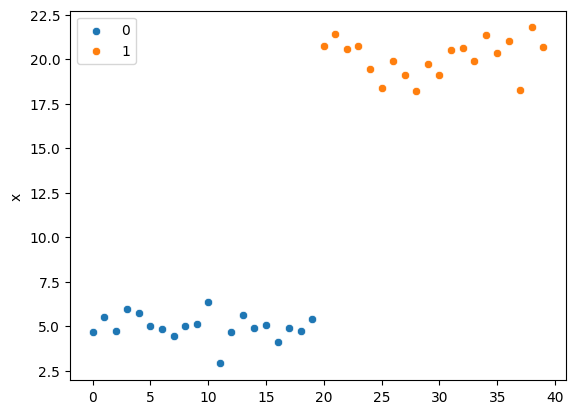

In [5]:
# Scatter plot to see the probability distribution of the labels within the dataset
sb.scatterplot(data=df['x'][df['y']==0], label='0')
sb.scatterplot(data=df['x'][df['y']==1], label='1')
plt.show()

🔎 To distinguish the difference easily. The real life scenarios will be harder than this.

## Manual Implementation of LDA<a id='manual'></a>

The mean (mean) value of each input ($x$) for each class ($k$) can be estimated in the normal way by dividing the sum of values by the total number of values.
$$mean_k = \frac{1}{n_k} × \sum\limits_{i=1}^{n}x_i$$

Where $mean_k$ is the mean value of $x$ for the class $k$, $n_k$ is the number of instances with class $k$. The variance is calculated across all classes as the average squared difference of each value from the mean.

$$\sigma^2 = \frac{1}{n - K} × \sum\limits_{i=1}^{n}(x_i - mean_k))^2$$

Where $\sigma^2$ is the variance across all inputs ($x$), $n$ is the number of instances, $K$ is the number of classes and meank is the mean of x for the class to which $x_i$ belongs.


### Making Predictions with LDA

$$$$
$$D_k(x) = x × \frac{mean_k}{\sigma^2} - \frac{mean_k^2}{2 × \sigma^2} + ln(P(k))$$

$Dk(x)$ is the discriminate function for class $k$ given input $x$, the $mean_k$, $\sigma^2$ and $P(k)$ are all estimated from your data. The $ln()$ function is the natural logarithm.

$$P(k) = \frac{n_k}{n}$$

In [6]:
# Calculating probability P(k)
prob_0 = len(df[df['y']==0]) / len(df)
print('Probability of getting 0: ', prob_0)
prob_1 = len(df[df['y']==1]) / len(df)
print('Probability of getting 1: ', prob_1)

Probability of getting 0:  0.5
Probability of getting 1:  0.5


In [7]:
# Calculating mean of each classes mean_k
mean_0 = df['x'][df['y']==0].mean()
print('Average of x where y is 0: ', mean_0)
mean_1 = df['x'][df['y']==1].mean()
print('Average of x where y is 1: ', mean_1)

Average of x where y is 0:  4.975415506999999
Average of x where y is 1:  20.087062921


In [8]:
# Calculating the variance of x
df['x-mean'] = ''
df['x-mean'] = np.where(df['y'] == 0, mean_0 - df['x'], df['x-mean'])
df['x-mean'] = np.where(df['y'] == 1, mean_1 - df['x'], df['x-mean'])
df['x-mean_2'] = df['x-mean'].pow(2)
sum_0_2 = df['x-mean_2'][df['y']==0].sum()
print(sum_0_2)
sum_1_2 = df['x-mean_2'][df['y']==1].sum()
print(sum_1_2)
variance_x = (1 / (len(df['x']) - 2)) * (sum_0_2 + sum_1_2)
print('Variance: ', variance_x)

10.158230131719305
21.493167084411787
Variance:  0.8329315056876604


In [10]:
# Creating a dataframe to store all calculations
df_predictions = pd.DataFrame(columns=['x', 'Disc_y_0', 'Disc_y_1', 'Predictions', 'y', 'Error'])
df_predictions[['x', 'y']] = df[['x', 'y']]

# Calculating discriminate function for each class using previously calculated mean_k, variance and propabilities 
df_predictions['Disc_y_0'] = df_predictions['x'] * (mean_0 / variance_x) - (np.square(mean_0) / (2 * variance_x)) + np.log(prob_0)
df_predictions['Disc_y_1'] = df_predictions['x'] * (mean_1 / variance_x) - (np.square(mean_1) / (2 * variance_x)) + np.log(prob_1)

# Predicting by comparing the discriminate function results for each class
df_predictions.loc[df_predictions['Disc_y_0'] < df_predictions['Disc_y_1'], 'Predictions'] = 1
df_predictions.loc[df_predictions['Disc_y_0'] > df_predictions['Disc_y_1'], 'Predictions'] = 0

#
df_predictions.loc[df_predictions['Predictions'] == df_predictions['y'], 'Error'] = 0
df_predictions.loc[df_predictions['Predictions'] != df_predictions['y'], 'Error'] = 1

# Displaying the results
df_predictions.head(40)

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,-130.334904,0,0,0
1,5.509199,17.355364,-110.043586,0,0,0
2,4.702792,12.538388,-129.490986,0,0,0
3,5.956707,20.028498,-99.251440,0,0,0
4,5.738622,18.725798,-104.510782,0,0,0
5,5.027283,14.476700,-121.665510,0,0,0
6,4.805434,13.151510,-127.015650,0,0,0
7,4.425689,10.883150,-136.173617,0,0,0
8,5.009369,14.369689,-122.097542,0,0,0
9,5.116719,15.010932,-119.508674,0,0,0


In [11]:
# Calculating the accuracy metric
acc = (1 - (df_predictions['Error'].sum() / len(df_predictions['Error']))) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 100.00%


## Scikit Learn Functio with Sample Data<a id='sklearn'></a>

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
# Creating the model
model = LinearDiscriminantAnalysis(store_covariance=True)
model.fit(np.array(x).reshape(-1,1), y)
acc = model.score(np.array(x).reshape(-1,1), y)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 100.00%


In [14]:
model.means_

array([[ 4.97541551],
       [20.08706292]])

In [15]:
model.covariance_

array([[0.79128493]])

🔎 As you can see above, both manual implementation and the sklearn function returns the same accuracy score. Let's try it with a real life data.

## Real Life Dataset<a id='realdata'></a>

The following data is collected from [Kaggle](https://www.kaggle.com/datasets/dragonheir/logistic-regression). It contains 400 instances of a social media campaign. It has the gender, age, estimated salary of the users who have seen the campaign and if they purchased the item or not. 

In [16]:
df_social = pd.read_csv('Data/Social_Network_Ads.csv')
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


🔎 `User ID` column contains the unique identifier of the users. That's why we'll remove this feature as it doesn't have any predictive on the label (`Purchased`).

In [17]:
df_social.drop('User ID', axis=1, inplace=True)

In [24]:
df_social.describe(include='all')

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


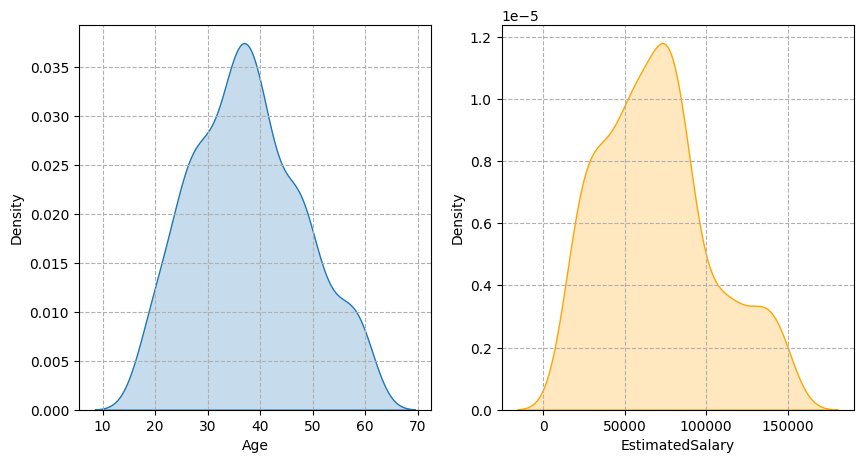

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sb.kdeplot(x=df_social['Age'], label='Age', fill=True)
plt.grid(linestyle = '--')
plt.subplot(1,2,2)
sb.kdeplot(x=df_social['EstimatedSalary'], label='Estimated Salary', fill=True, color='orange')
plt.grid(linestyle = '--')
plt.show()

🔎 Based on the above graphs we can say that these two features has Gaussian likely distribution.

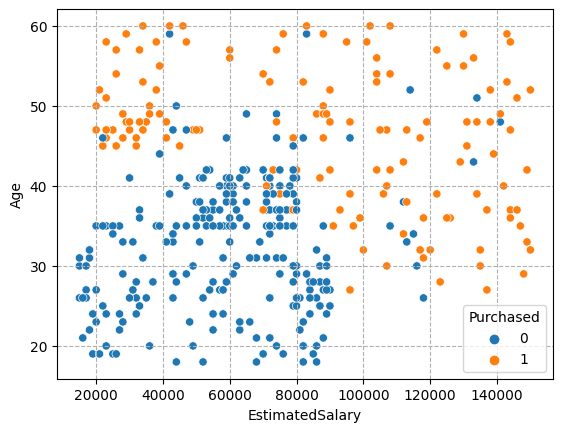

In [29]:
sb.scatterplot(data = df_social, x = 'EstimatedSalary', y='Age', hue='Purchased')
plt.grid(linestyle = '--')
plt.show()

🔎 We may assume that the classes are well seperated from the above graph.

In [34]:
df_social.replace({'Gender':{'Male':1, 'Female':0}}, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
x = df_social.drop('Purchased', axis=1)
y = df_social['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
model.fit(x_train, y_train)
print(model.means_)
print(model.covariance_)

[[0.48768473 0.35890218 0.33435504]
 [0.46153846 0.66666667 0.52383666]]
[[ 0.24936292 -0.00597584 -0.00959316]
 [-0.00597584  0.03766988 -0.0047399 ]
 [-0.00959316 -0.0047399   0.0541152 ]]


In [38]:
y_hat = model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_hat)*100))

Accuracy score: 85.00%


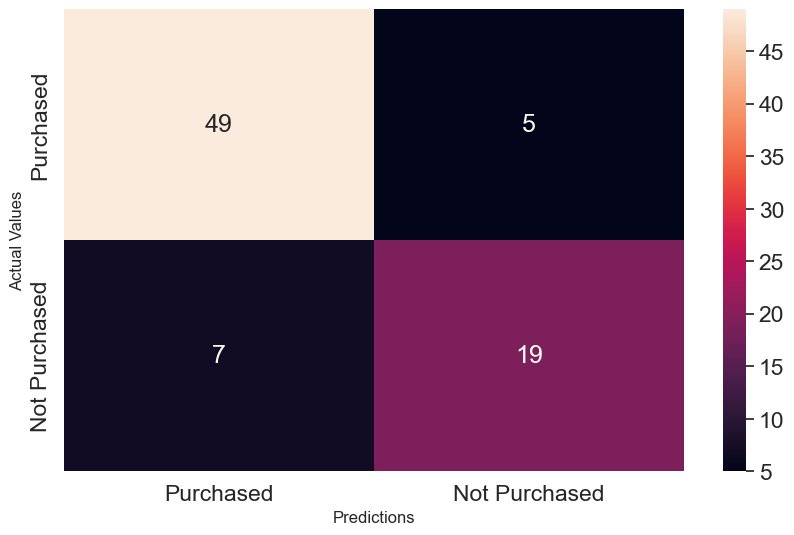

In [44]:
cm = confusion_matrix(y_test, y_hat)
labels = ['Purchased', 'Not Purchased']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(10,6))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression() # Using defult lbfgs functions
lr_model.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_hat_lr = lr_model.predict(x_test)
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_hat_lr)*100))

Accuracy score: 86.25%


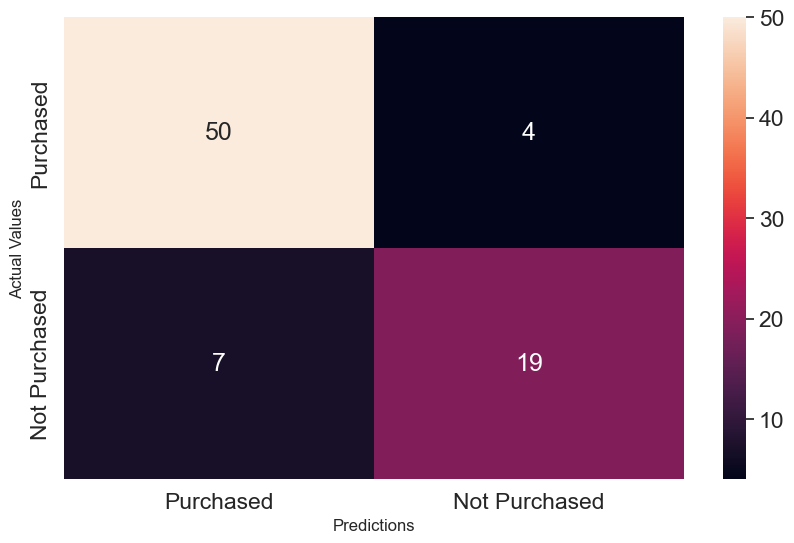

In [53]:
cm = confusion_matrix(y_test, y_hat_lr)
labels = ['Purchased', 'Not Purchased']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(10,6))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

### Iris Dataset

The purpose of this session to demonstrate that LDA is capable of solving multi-class classification problems as well.

In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


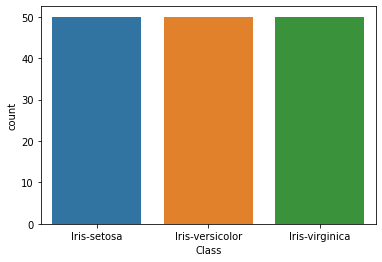

In [ ]:
sb.countplot(dataset['Class'])
plt.show()

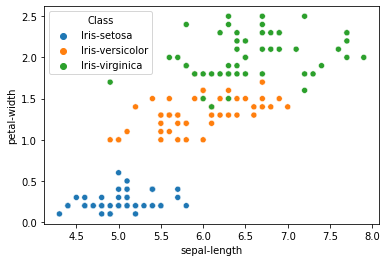

In [ ]:
sb.scatterplot(data=dataset, x='sepal-length', y='petal-width', hue='Class')
plt.show()

In [ ]:
dataset.describe(include='all')

,sepal-length,sepal-width,petal-length,petal-width,Class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
dataset.replace({'Class':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace=True)

In [ ]:
x = dataset.drop('Class', axis=1).values
y = dataset['Class'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101)

In [ ]:
model.fit(x_train, y_train)
model.means_

array([[4.9925    , 3.415     , 1.47      , 0.235     ],
       [5.94473684, 2.78421053, 4.3       , 1.33947368],
       [6.6047619 , 3.00714286, 5.58095238, 2.05714286]])

In [ ]:
model.covariance_

array([[0.25783954, 0.08666595, 0.16579008, 0.04143305],
       [0.08666595, 0.10074486, 0.05811429, 0.03696284],
       [0.16579008, 0.05811429, 0.18473968, 0.04689762],
       [0.04143305, 0.03696284, 0.04689762, 0.04053872]])

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_hat)*100))

Accuracy score: 100.00%


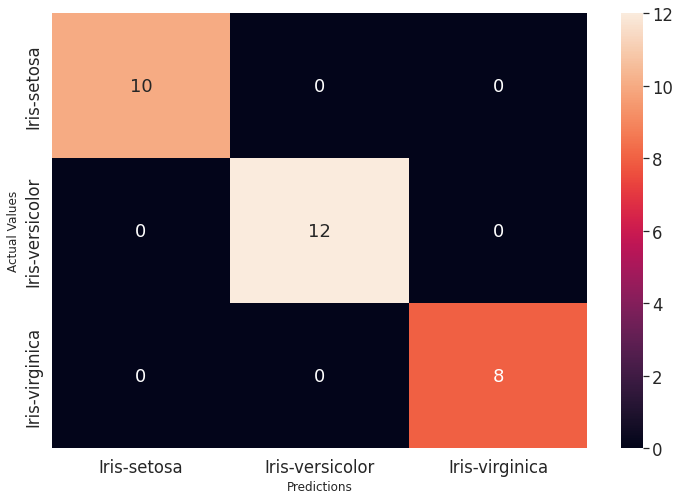

In [ ]:
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

